In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

# Generating the Dataset

In [2]:
def synthetic_data(w, b, num_examples): #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
# torch.normal?

In [4]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:',features[0], '\nlabel:', labels[0])

features: tensor([0.9947, 0.4777]) 
label: tensor([4.5512])


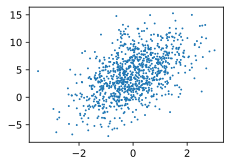

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(0)].detach().numpy(), labels.detach().numpy(), 1)

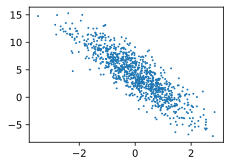

In [6]:
d2l.plt.scatter(features[:,(1)].detach().numpy(), labels.detach().numpy(), 1)

# Reacing the Dataset

In [7]:
# For show, not efficient.
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # the examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indicies = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indicies], labels[batch_indicies]

In [8]:
batch_size = 10
for X, y in data_iter(batch_size,features,labels):
    print(X, '\n', y)
    break

tensor([[-3.0056e-01, -2.4441e-02],
        [-3.1548e-01,  1.8401e+00],
        [-1.0856e-03, -1.3297e+00],
        [-1.2505e+00, -1.0756e+00],
        [-8.0912e-01, -3.8221e-01],
        [-1.4031e+00, -7.6717e-01],
        [-1.2273e+00, -8.6386e-01],
        [-5.6500e-01,  5.7799e-01],
        [-5.5511e-01, -1.2123e+00],
        [ 1.4453e+00, -3.0507e-01]]) 
 tensor([[ 3.6918],
        [-2.6934],
        [ 8.7086],
        [ 5.3424],
        [ 3.8761],
        [ 4.0048],
        [ 4.6817],
        [ 1.1159],
        [ 7.2121],
        [ 8.1255]])


# Initializing Model Parameters

In [9]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w,b

(tensor([[0.0228],
         [0.0015]], requires_grad=True),
 tensor([0.], requires_grad=True))

# Defining the Model

In [10]:
def linreg(X, w, b): #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

# Defining the Loss Function

In [11]:
def squared_loss(y_hat, y): #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))**2 /2

# Defining the Opimization Algorithm

In [12]:
def sgd(params, lr, batch_size): #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr* param.grad / batch_size
            param.grad.zero_()

# Training

In [13]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

In [14]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
        
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.039844
epoch 2, loss 0.000148
epoch 3, loss 0.000049
epoch 4, loss 0.000049
epoch 5, loss 0.000049


In [15]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-5.3644e-05, -4.1842e-04], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0003], grad_fn=<RsubBackward1>)
